In [1]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Ayush
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df = pd.read_csv(r"C:\Users\Ayush Gupta\Desktop\Semester 6\ML\ML_Practicals\spam.csv", encoding = 'ISO-8859-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
def text_preprocess(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in  stopwords.words('english')]
    return " ".join(text)

In [6]:
for text in df.v2:
    text = text_preprocess(text)

In [7]:
vectorizer = TfidfVectorizer()

In [8]:
X = vectorizer.fit_transform(df.v2)
y = df.v1.map({"spam":1,"ham":0})

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20) 

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Spam_model = LogisticRegression(solver='liblinear', penalty='l1')
Spam_model.fit(X_train, y_train)
pred = Spam_model.predict(X_test)
accuracy_score(y_test, pred)

0.9575358851674641

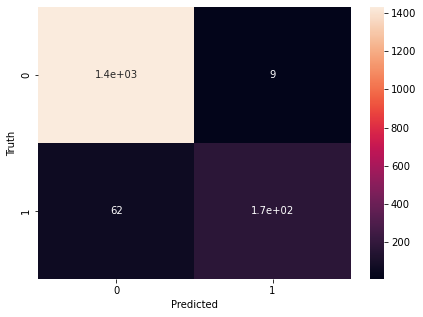

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
cm = confusion_matrix(y_test, pred)
cm

plt.figure(figsize = (7,5))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [12]:
from sklearn.metrics import average_precision_score, recall_score
precision = average_precision_score(y_test, pred)
recall = recall_score(y_test, pred)
print("Precision: ", precision)
print("Recall: ", recall)

Precision:  0.7342916401421032
Recall:  0.7339055793991416


In [13]:
pred = pd.Series(pred)
pred.map({"ham": 0, "spam": 1})

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1667   NaN
1668   NaN
1669   NaN
1670   NaN
1671   NaN
Length: 1672, dtype: float64

In [14]:
y_test.map({"ham": 0, "spam": 1})

4732   NaN
4952   NaN
3724   NaN
5261   NaN
1274   NaN
        ..
4196   NaN
984    NaN
482    NaN
5147   NaN
3185   NaN
Name: v1, Length: 1672, dtype: float64